In [9]:
# Supervised Fraud Detection Algorithms
#### Import Libraries
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

In [ ]:
#### Load Data Function
def load_data(path, sample_frac=0.3):
    df = pd.read_csv(path)
    df = df.sample(frac=sample_frac, random_state=42).reset_index(drop=True)
    return df

file_path = r"your feature data csv"
df = load_data(file_path)
df.head()

,step,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,orig_balance_diff,dest_balance_diff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,suspicious_zero_balance
0,0.196765,0.054899,sdv-pii-1hybr,0.119315,1.538026e-01,sdv-pii-a89t7,0.009423,1.362913e-02,0.0,0.0,-0.034488,0.004206,False,False,False,False,0
1,0.605121,0.003378,C1114778583,0.000000,1.290909e-05,C689793442,0.100335,4.757566e-03,0.0,0.0,-0.000013,-0.095577,False,False,True,False,1
2,0.075472,0.005456,sdv-pii-suuas,0.000004,5.350662e-07,sdv-pii-k2ai2,0.025373,1.835626e-02,0.0,0.0,0.000003,-0.007017,True,False,False,False,0
3,0.281671,0.015781,C1629867471,0.000024,8.491292e-04,C350001556,0.011817,1.146398e-08,0.0,0.0,-0.000825,-0.011817,True,False,False,False,0
4,0.486523,0.013992,C1758188565,0.004784,1.079286e-02,M1856647425,0.025409,1.781889e-05,0.0,0.0,-0.006008,-0.025391,True,False,False,False,0


In [4]:
#### Load and Preprocess Data
def preprocess_data(df):
    y = df['isfraud']
    X = df.drop(columns=['isfraud'])
    X_numeric = X.select_dtypes(include=['int64', 'float64'])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)

    return X_scaled, y, scaler

In [5]:
### To Run Preprocess
X_scaled, y, scaler = preprocess_data(df)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [7]:
#####  Train and Save Models
def train_and_save_models(X_train, y_train, base_dir="Trained_Models/Supervised"):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "DecisionTree": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(n_estimators=100, n_jobs=-1),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
        "LightGBM": LGBMClassifier(verbosity=-1)
    }

    os.makedirs(base_dir, exist_ok=True)
    trained_models = {}

    for name, model in models.items():
        print(f" Training {name}...")
        model.fit(X_train, y_train)

        model_dir = os.path.join(base_dir, name)
        os.makedirs(model_dir, exist_ok=True)

        model_path = os.path.join(model_dir, f"{name}.joblib")
        joblib.dump(model, model_path)
        print(f" Saved {name} to {model_path}")

        trained_models[name] = model

    print(" All models trained and saved successfully.")
    return trained_models

trained_models = train_and_save_models(X_train, y_train)

 Training LogisticRegression...
 Saved LogisticRegression to Trained_Models/Supervised\LogisticRegression\LogisticRegression.joblib
 Training DecisionTree...
 Saved DecisionTree to Trained_Models/Supervised\DecisionTree\DecisionTree.joblib
 Training RandomForest...
 Saved RandomForest to Trained_Models/Supervised\RandomForest\RandomForest.joblib
 Training XGBoost...
 Saved XGBoost to Trained_Models/Supervised\XGBoost\XGBoost.joblib
 Training LightGBM...
 Saved LightGBM to Trained_Models/Supervised\LightGBM\LightGBM.joblib
 All models trained and saved successfully.


c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


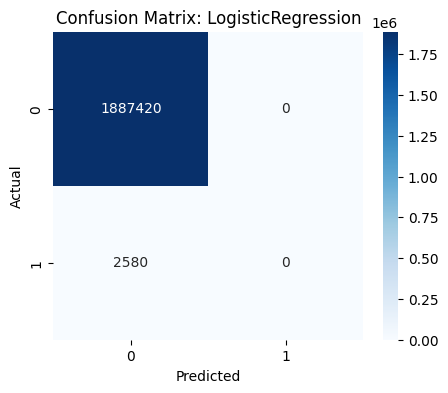

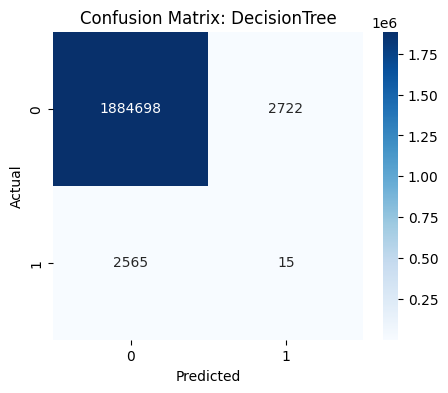

c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


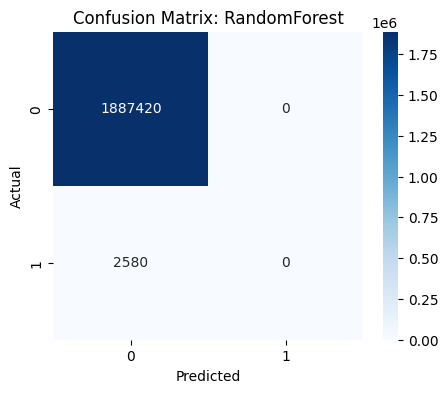

c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


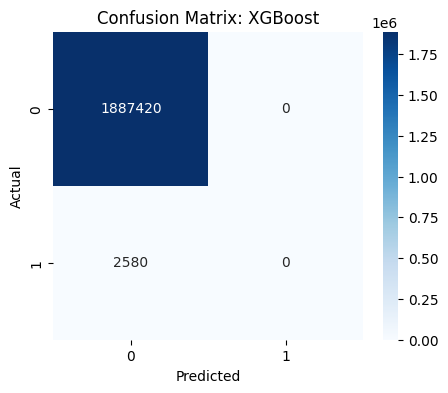

c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


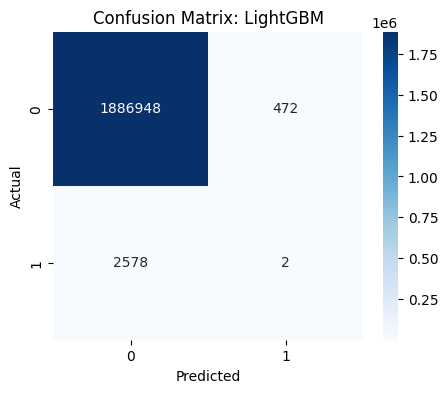

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,1.0,0.00,0.00,0.00,0.5
1,DecisionTree,1.0,0.01,0.01,0.01,0.5
2,RandomForest,1.0,0.00,0.00,0.00,0.5
3,XGBoost,1.0,0.00,0.00,0.00,0.5
4,LightGBM,1.0,0.00,0.00,0.00,0.5


In [10]:
#####  Evaluate Models and Save Confusion Matrices
def evaluate_models(models, X_test, y_test):
    metrics = []

    for name, model in models.items():
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)

        metrics.append({
            "Model": name,
            "Accuracy": round(acc, 2),
            "Precision": round(prec, 2),
            "Recall": round(rec, 2),
            "F1 Score": round(f1, 2),
            "ROC AUC": round(roc, 2)
        })

        # Plot confusion matrix inline
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    # Return evaluation DataFrame
    return pd.DataFrame(metrics)

# Run evaluation
eval_df = evaluate_models(trained_models, X_test, y_test)
eval_df

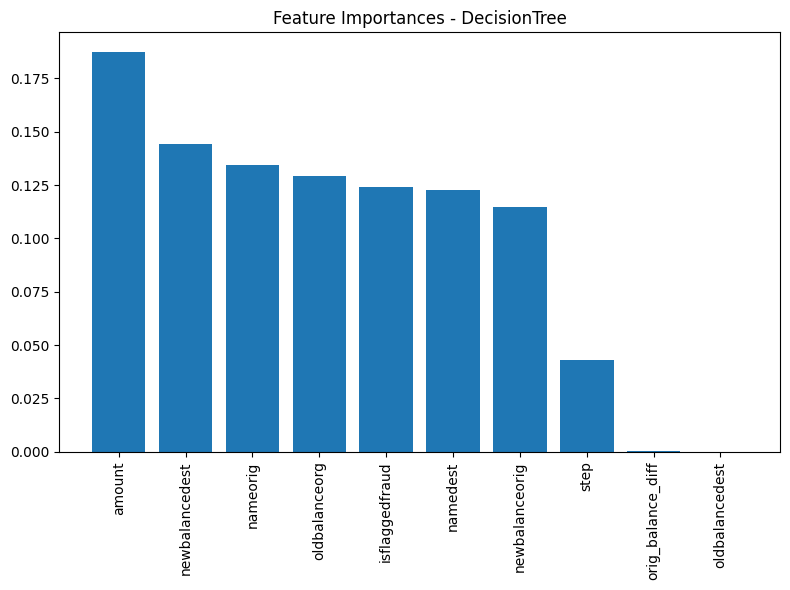

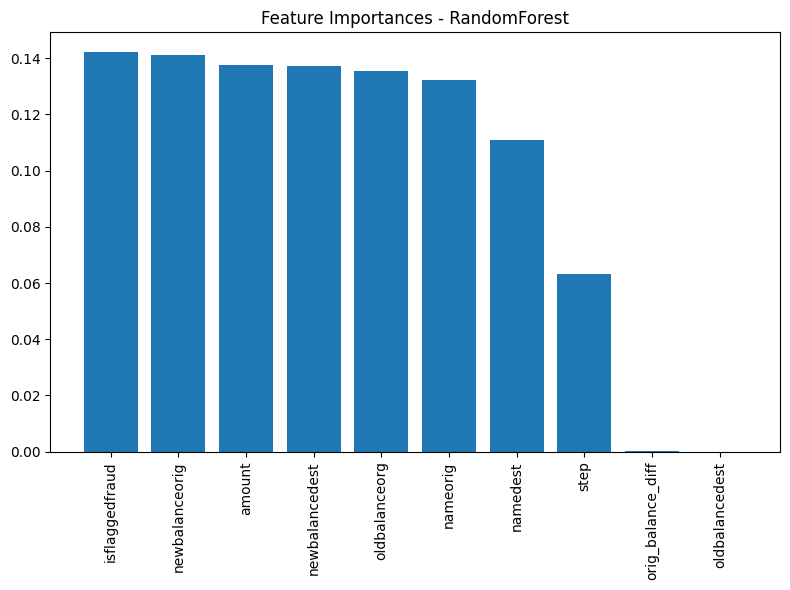

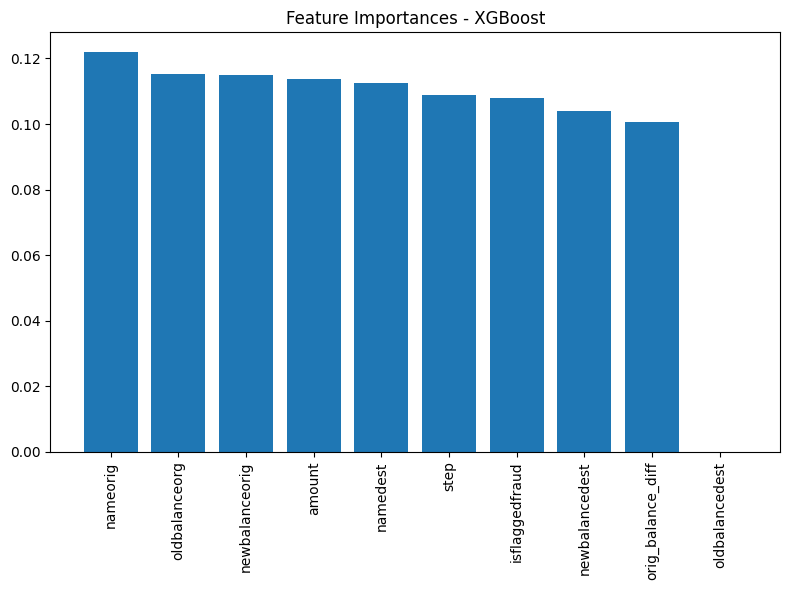

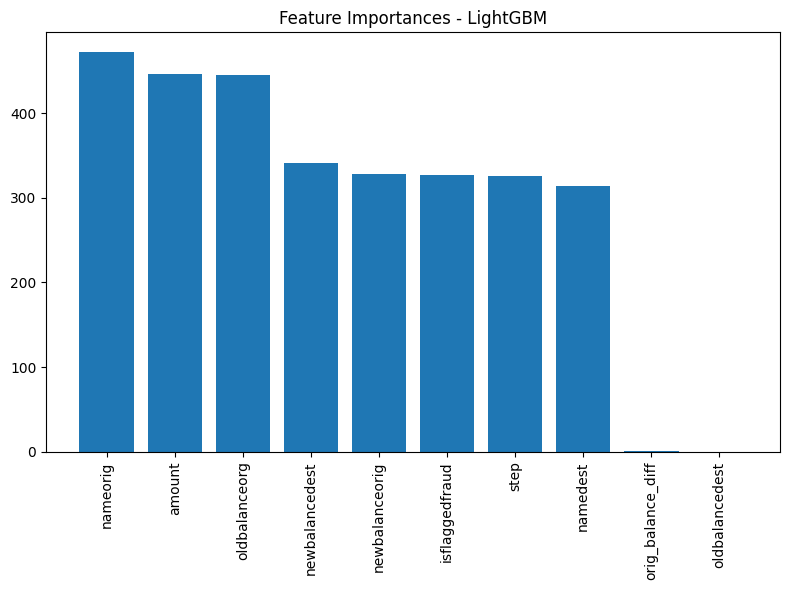

In [13]:
##### Plot Feature Importances of ---- Tree-Based Models
def plot_feature_importance(models, feature_names):
    for name, model in models.items():
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]

            plt.figure(figsize=(8, 6))
            plt.title(f"Feature Importances - {name}")
            plt.bar(range(len(importances)), importances[indices])
            plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
            plt.tight_layout()
            plt.show()

plot_feature_importance(trained_models, df.drop(columns=['isfraud']).columns)